Hola **Duver**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<center>
    <h1>PROYECTO FINAL</h1>
</center>

<center>
    <h1>ANÁLISIS DE EFICACIA DE OPERADORES</h1>
</center>



Enlace de Google Drive para acceder a la presentación en pdf

https://drive.google.com/file/d/1TuP-NCoK0yAJtDq_FVwHb0sSEckoY4dO/view?usp=drive_link

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No se puede acceder a la presentación, está cómo privada. Por favor, en la parte de compartir selecciona la opción para que cualquiera con el link pueda acceder y para comprobar que quedó correctamente configurado puedes abrir el link en una venta de incógnito para verificar que se pueda acceder sin problema.
</div>

# Introducción

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

Para tal efecto, este proyecto contiene:

- Análisis exploratorio de datos
- Identificación de operadores ineficaces
- Prueba de las hipótesis estadísticas

**Descripción de los datos**

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

 

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

# Objetivo

Analizar el desempeño de los operadores del servicio de telefonía virtual CallMeMaybe para identificar a aquellos con menor eficacia en la gestión de llamadas. El análisis considerará el volumen y proporción de llamadas perdidas, los tiempos de espera en llamadas entrantes y, cuando corresponda, la cantidad de llamadas salientes realizadas. A partir de los datos históricos, se realizará un análisis exploratorio, la identificación de operadores ineficaces y la validación de hipótesis estadísticas, con el fin de generar conclusiones y visualizaciones que faciliten la toma de decisiones y la optimización del servicio.

# Fase 1. Preparación de datos

## 1.1 Importación de librerías y cargue de datos

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import spearmanr
from scipy.stats import kruskal




calls_raw = pd.read_csv('/datasets/telecom_dataset_us.csv')

clients_raw = pd.read_csv('/datasets/telecom_clients_us.csv')

## 1.2  Análisis exploratorio de datos

In [2]:
print("Calls:", calls_raw.shape)
print("Clients:", clients_raw.shape)

# Inspección inicial
display(calls_raw.head())
display(clients_raw.head())


Calls: (53902, 9)
Clients: (732, 3)


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


**Observaciones iniciales**

**Dimensiones**

calls_raw: 53,902 filas × 9 columnas: es un volumen razonable suficiente para el análisis.

clients_raw: 732 filas × 3 columnas: cada fila parece representar un cliente (empresa usuaria del servicio).

**Estructura correcta**

calls_raw incluye:
user_id, date, direction, internal, operator_id, is_missed_call, calls_count, call_duration, total_call_duration.

clients_raw incluye:
user_id, tariff_plan, date_start.

**Tipos y contenido**

date: ya está en formato de fecha con zona horaria (2019-08-04 00:00:00+03:00).

internal: aparece como True/False.

is_missed_call: aparece como True/False.

operator_id: tiene NaN en algunas filas (ejemplo fila 0). probablemente significa que la llamada no fue atendida por un operador.

calls_count: entero (número de llamadas).

call_duration: puede ser 0 (ejemplo en llamadas perdidas).

total_call_duration: incluye tiempo de espera (ej. 4 seg aunque duración = 0).

En clients_raw

tariff_plan: categórica (ejemplo: "A").

date_start: fecha de inicio del cliente.

## 1.3 Valores nulos y resumen general

In [3]:
# Exploración de valores nulos
print("Valores nulos en calls_raw:")
print(calls_raw.isna().sum())

print("\nValores nulos en clients_raw:")
print(clients_raw.isna().sum())

# Estadísticas descriptivas básicas
print("\n--- Estadísticas numéricas de calls_raw ---")
display(calls_raw.describe())

print("\n--- Distribución de direction ---")
print(calls_raw["direction"].value_counts())

print("\n--- Distribución de internal ---")
print(calls_raw["internal"].value_counts())

print("\n--- Distribución de is_missed_call ---")
print(calls_raw["is_missed_call"].value_counts())


Valores nulos en calls_raw:
user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

Valores nulos en clients_raw:
user_id        0
tariff_plan    0
date_start     0
dtype: int64

--- Estadísticas numéricas de calls_raw ---


,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,45730.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,916535.993002,16.451245,866.684427,1157.133297
std,598.883775,21254.123136,62.917170,3731.791202,4403.468763
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900788.000000,1.000000,0.000000,47.000000
50%,167162.000000,913938.000000,4.000000,38.000000,210.000000
75%,167819.000000,937708.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000



--- Distribución de direction ---
out    31917
in     21985
Name: direction, dtype: int64

--- Distribución de internal ---
False    47621
True      6164
Name: internal, dtype: int64

--- Distribución de is_missed_call ---
False    30334
True     23568
Name: is_missed_call, dtype: int64


**ANÁLISIS**

**Valores nulos**

operator_id: 8172 nulos (15% de las filas). Probablemente llamadas que no llegaron a ser atendidas, por eso no hay operador asignado.

internal: 117 nulos (0.2%). Muy pocos, se podrían imputar a False o dejarlos como NaN y excluir en el análisis.

El resto sin nulos.


**Duraciones**

**call_duration:**

Mínimo = 0 (normal para llamadas perdidas).

Máximo = 144,395 segundos ≈ 40 horas (outlier).

**total_call_duration:**

Máximo = 166,155 segundos ≈ 46 horas (también un outlier).

Esto significa que hay llamadas anómalamente largas, posiblemente por registros mal cerrados.

**calls_count**

Promedio = 16.4, pero máximo = 4,817 llamadas en un día por un operador.

Puede ser real (contact center grande) o un caso atípico. 

**Distribución de direction**

"out" = 31,917

"in" = 21,985

Mayor proporción de salientes (~59% vs 41%).

**Distribución de internal**

False = 47,621 (~89%)

True = 6,164 (~11%)

La mayoría de las llamadas no son internas.

**Distribución de is_missed_call**

False = 30,334

True = 23,568 (~44%)

Casi la mitad de las llamadas fueron perdidas. Esto es un hallazgo importante: ya apunta a problemas de eficacia.


**Tenemos un dataset bastante limpio, pero con nulos en operator_id y outliers en duraciones que habrá que tratar. La tasa de llamadas perdidas es muy alta (44%), lo que confirma la relevancia del proyecto. La proporción de llamadas internas es baja (~11%).**

### Tratamiento de valores nulos

In [4]:
# 1. Revisamos nuevamente los nulos
print("Valores nulos por columna:")
display(calls_raw.isnull().sum())

# 2. Variable 'internal' (117 nulos)
# En lugar de dejarlos como NaN, los etiquetamos como "Desconocida"
calls_raw["internal"] = calls_raw["internal"].fillna("Desconocida")

# 3. Variable 'operator_id' (8172 nulos)
# Estas son llamadas sin operador asignado (ej. llamadas perdidas sin enrutamiento).
# No las imputamos porque no existe un operador válido.
# Nota: En los análisis por operador, estos registros ya quedarán excluidos automáticamente.
calls_raw["operator_id"] = calls_raw["operator_id"].astype("float")

# 4. Confirmamos
print("\nValores nulos restantes después del tratamiento:")
display(calls_raw.isnull().sum())

# Nota: No se modifican los resultados de los análisis previos,
# solo se mejora la legibilidad de la variable 'internal'
# y se deja claro que 'operator_id' nulo significa "sin asignación".


Valores nulos por columna:


user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64


Valores nulos restantes después del tratamiento:


user_id                   0
date                      0
direction                 0
internal                  0
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

## 1.4 Creación de variables derivadas y enriquecimiento del dataset.

In [5]:
# Partimos de los dataframes ya cargados
calls = calls_raw.copy()
clients = clients_raw.copy()

# Variable derivada: wait_time
calls["wait_time"] = calls["total_call_duration"] - calls["call_duration"]

# Fechas coherentes (sin zona horaria)
#    - 'date' puede venir con tz; la convertimos a UTC y le quitamos tz -> datetime naive
calls["date"] = pd.to_datetime(calls["date"], errors="coerce", utc=True).dt.tz_localize(None)

#    - 'date_start' suele venir sin tz; solo parseamos
clients["date_start"] = pd.to_datetime(clients["date_start"], errors="coerce")

# Otras derivadas de fecha
calls["day_of_week"] = calls["date"].dt.day_name()
calls["date_only"]   = calls["date"].dt.date

# Merge con clientes
df = calls.merge(clients, on="user_id", how="left")

# Antigüedad del cliente (días)
df["client_tenure_days"] = (df["date"] - df["date_start"]).dt.days

# Vista rápida para validar
display(df.head(5))
print(
    "wait_time min/max:", df["wait_time"].min(), df["wait_time"].max(), 
    "| tenure min/max:", df["client_tenure_days"].min(), df["client_tenure_days"].max()
)


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,day_of_week,date_only,tariff_plan,date_start,client_tenure_days
0,166377,2019-08-03 21:00:00,in,False,NaN,True,2,0,4,4,Saturday,2019-08-03,B,2019-08-01,2
1,166377,2019-08-04 21:00:00,out,True,880022.0,True,3,0,5,5,Sunday,2019-08-04,B,2019-08-01,3
2,166377,2019-08-04 21:00:00,out,True,880020.0,True,1,0,1,1,Sunday,2019-08-04,B,2019-08-01,3
3,166377,2019-08-04 21:00:00,out,True,880020.0,False,1,10,18,8,Sunday,2019-08-04,B,2019-08-01,3
4,166377,2019-08-04 21:00:00,out,False,880022.0,True,3,0,25,25,Sunday,2019-08-04,B,2019-08-01,3


wait_time min/max: 0 46474 | tenure min/max: -1 118


**ANÁLISIS**

**wait_time:**

Mínimo = 0 (esperado: algunas llamadas no tuvieron espera).

Máximo = 46,474 segundos ≈ 12.9 horas - outlier fuerte (probablemente registros de colas mal cerradas).


**client_tenure_days:**

Rango: -1 a 118 días.

Los valores negativos indican llamadas antes de la fecha de alta del cliente. Son datos inconsistentes (pocos casos, luego los revisamos/filtramos).

El máximo 118 días es lógico: dataset parece cubrir unos pocos meses.


**En df.head() se ve claramente que:**

Llamadas perdidas tienen call_duration = 0 pero sí hay wait_time > 0.

Las variables de cliente (tariff_plan, date_start, client_tenure_days) están unidas correctamente.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizado el análisis inicial y el tratamiento de los dataset previo a su exploración, siempre hay que buscar tener la mejor calidad posible en tus datos
</div>

# 2. Análisis exploratorio (EDA)

## 2.1 Estadísticas descriptivas

In [6]:

# 1. Valores nulos por columna
print("Valores nulos en calls_raw:")
display(calls_raw.isnull().sum())

print("Valores nulos en clients_raw:")
display(clients_raw.isnull().sum())

# 2. Estadísticas numéricas de interés
print("\n--- Estadísticas numéricas de calls_raw ---")
display(calls_raw[["calls_count", "call_duration", "total_call_duration"]].describe())

# 3. Distribuciones categóricas
print("\n--- Distribución de 'direction' ---")
display(calls_raw["direction"].value_counts())

print("\n--- Distribución de 'internal' ---")
display(calls_raw["internal"].value_counts(dropna=False))  # mostramos también los nulos

print("\n--- Distribución de 'is_missed_call' ---")
display(calls_raw["is_missed_call"].value_counts())


Valores nulos en calls_raw:


user_id                   0
date                      0
direction                 0
internal                  0
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

Valores nulos en clients_raw:


user_id        0
tariff_plan    0
date_start     0
dtype: int64


--- Estadísticas numéricas de calls_raw ---


,calls_count,call_duration,total_call_duration
count,53902.000000,53902.000000,53902.000000
mean,16.451245,866.684427,1157.133297
std,62.917170,3731.791202,4403.468763
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,47.000000
50%,4.000000,38.000000,210.000000
75%,12.000000,572.000000,902.000000
max,4817.000000,144395.000000,166155.000000



--- Distribución de 'direction' ---


out    31917
in     21985
Name: direction, dtype: int64


--- Distribución de 'internal' ---


False          47621
True            6164
Desconocida      117
Name: internal, dtype: int64


--- Distribución de 'is_missed_call' ---


False    30334
True     23568
Name: is_missed_call, dtype: int64

**ANÁLISIS**

El dataset presenta valores nulos en internal (117) y en operator_id (8172). Estos casos representan llamadas sin clasificación o sin asignación de operador.

Las variables numéricas (calls_count, call_duration, total_call_duration) muestran distribuciones altamente sesgadas, con medianas bajas y máximos extremadamente altos. Esto confirma la presencia de outliers que deberán tratarse más adelante.

En cuanto a variables categóricas:

Dirección (direction): ~59% de llamadas son salientes y ~41% entrantes.

Internas vs externas (internal): la mayoría son externas (~88%).

Estado de la llamada (is_missed_call): ~44% de las llamadas fueron perdidas.

Estos hallazgos iniciales indican que:

La base tiene una alta proporción de pérdidas, lo cual es crítico desde el punto de vista de negocio.

Existen outliers extremos que distorsionan los promedios y requieren tratamiento.

La mayor carga está en llamadas externas, por lo que la eficacia de operadores deberá evaluarse principalmente en este tipo de tráfico.

## 2.2 Histograma de la duración de las llamadas (call_duration).

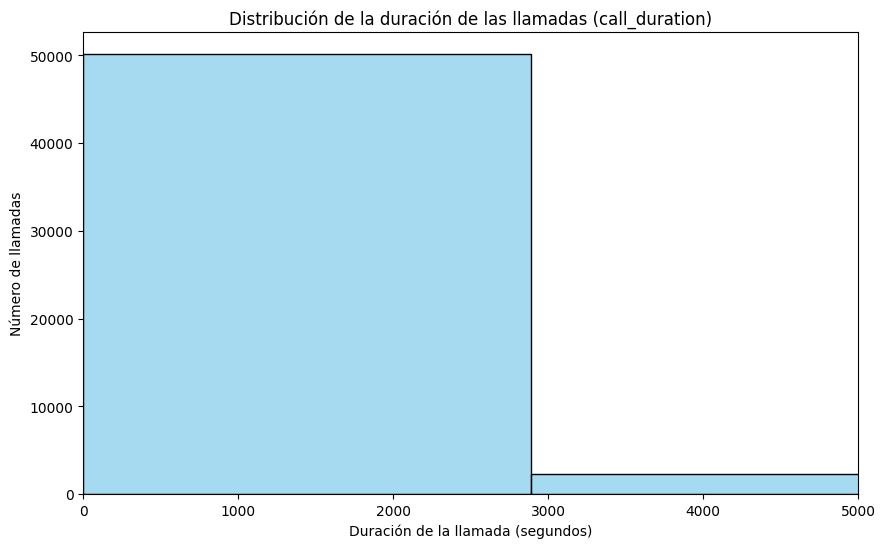

Duración mínima: 0
Duración máxima: 144395


In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df["call_duration"], bins=50, kde=False, color="skyblue")

plt.title("Distribución de la duración de las llamadas (call_duration)")
plt.xlabel("Duración de la llamada (segundos)")
plt.ylabel("Número de llamadas")
plt.xlim(0, 5000)  # ponemos límite para ver mejor (recorta outliers)
plt.show()

# Valores extremos
print("Duración mínima:", df["call_duration"].min())
print("Duración máxima:", df["call_duration"].max())


**ANÁLISIS**


Duración mínima: 0 segundos. Corresponde a llamadas perdidas (sin conversación).

Duración máxima: 144,395 segundos (~40 horas). Esto es un outlier extremo y seguramente corresponde a un error de registro (llamada que quedó “colgada”).

Forma de la distribución (con límite en 5000s ≈ 1h20):

La mayoría de las llamadas se concentran en duraciones muy bajas (pocos segundos o minutos).

Claramente hay un sesgo fuerte a la derecha (muchos valores pequeños, pocos muy grandes).

Implicaciones para el análisis: Necesitamos tratar outliers: esas llamadas de 40 horas no reflejan la realidad del negocio.

Posibles enfoques:

Filtrar todo lo que esté por encima del percentil 99.

O definir un límite razonable (ejemplo: 2 horas).

Los valores 0 (llamadas perdidas) deben mantenerse, porque son clave para el proyecto.



Hacemos un segundo histograma con escala logarítmica en el eje X, para ver mejor la distribución completa (incluyendo valores grandes) sin que se aplaste todo en el rango bajo.

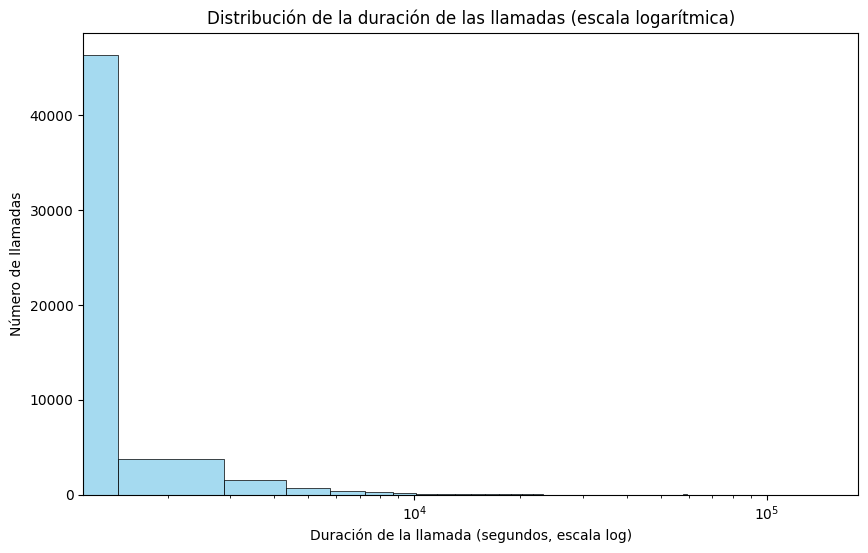

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df["call_duration"], bins=100, kde=False, color="skyblue")

plt.xscale("log")  # escala logarítmica en el eje X
plt.title("Distribución de la duración de las llamadas (escala logarítmica)")
plt.xlabel("Duración de la llamada (segundos, escala log)")
plt.ylabel("Número de llamadas")
plt.show()


**ANÁLISIS**

Se observa una altísima concentración en llamadas muy cortas. La gran mayoría dura menos de 100 segundos (~1.5 minutos). Esto incluye muchas llamadas perdidas (duración = 0).

Cola larga (sesgo a la derecha). Hay llamadas de hasta 10³–10⁴ segundos (tens de minutos a varias horas). A partir de ahí la frecuencia cae rápido, y los casos >10⁴ son anecdóticos (outliers).

Hay muchísimas llamadas breves o fallidas. Una fracción más pequeña de llamadas largas, pero con valores extremos que distorsionarían medias si no los tratamos.

Por lo anterior, debemos tratar por separado:

Llamadas perdidas (duration=0), porque son clave en la definición de ineficacia.

Llamadas normales (1 seg – 1 hora), que son la mayoría de las efectivas.

Llamadas atípicas (>2h, >7200 seg), que probablemente son errores de registro y se deberían excluir del análisis de eficacia.

## 2.3 Gráfico circular de llamadas internas vs externas, usando la variable internal.

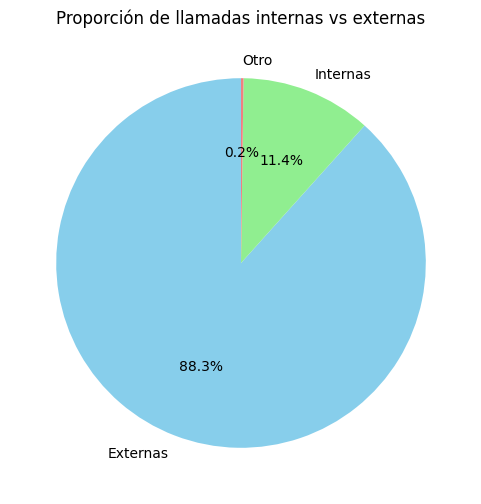

False          47621
True            6164
Desconocida      117
Name: internal, dtype: int64


In [9]:

# Conteo de internas vs externas (incluye NaN)
internal_counts = df["internal"].value_counts(dropna=False)

# Diccionario de etiquetas
labels_map = {False: "Externas", True: "Internas", np.nan: "Desconocidas"}

# Generar lista de etiquetas con el mapeo
labels = [labels_map[val] if val in labels_map else "Otro" for val in internal_counts.index]

# Pie chart corregido
plt.figure(figsize=(6,6))
plt.pie(
    internal_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "lightgreen", "lightcoral"]
)
plt.title("Proporción de llamadas internas vs externas")
plt.show()

print(internal_counts)



**ANÁLISIS**

Externas: 88.3%

Internas: 11.4%

Desconocidas: 0.2%

Ese 0.2% es insignificante y lo podemos excluir en análisis posteriores para no ensuciar los gráficos.

**Versión “limpia” (solo internas vs externas)**

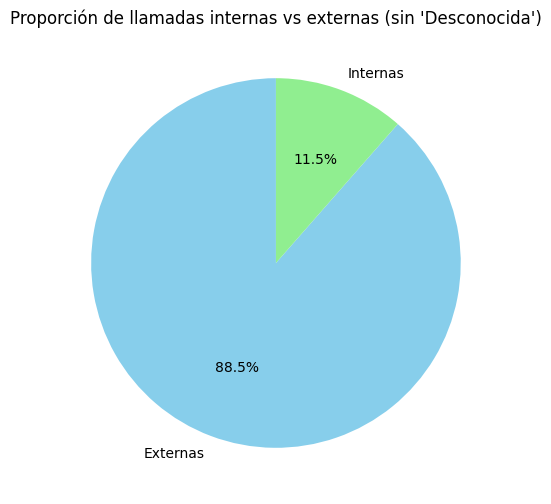

Externas    47621
Internas     6164
Name: internal, dtype: int64


In [10]:
# Fase 2 – Paso 2.3: Pie internas vs externas (limpio, sin "Desconocida")

# 1) Quedarnos solo con valores booleanos (True/False)
mask_valid = df["internal"].isin([True, False])

# 2) Mapear a etiquetas legibles
labels_map = {False: "Externas", True: "Internas"}
series_labeled = df.loc[mask_valid, "internal"].map(labels_map)

# 3) Contar y fijar el orden de las etiquetas para que coincidan con los valores
counts = series_labeled.value_counts().reindex(["Externas", "Internas"], fill_value=0)

# 4) Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "lightgreen"]
)
plt.title("Proporción de llamadas internas vs externas (sin 'Desconocida')")
plt.show()

print(counts)



### **ANÁLISIS**

Externas: 88.5%

Internas: 11.5%

## 2.4 Histograma de llamadas por día

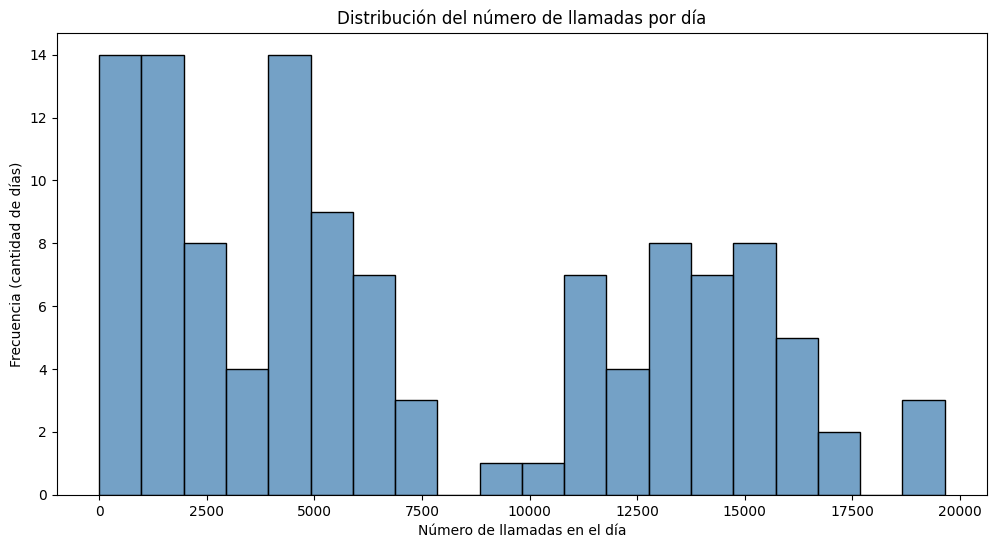

Min llamadas en un día: 2
Máx llamadas en un día: 19641
Promedio de llamadas por día: 7451.72


In [11]:
# Agrupamos por fecha y sumamos el número de llamadas
calls_per_day = df.groupby("date_only")["calls_count"].sum()

plt.figure(figsize=(12,6))
sns.histplot(calls_per_day, bins=20, color="steelblue", kde=False)

plt.title("Distribución del número de llamadas por día")
plt.xlabel("Número de llamadas en el día")
plt.ylabel("Frecuencia (cantidad de días)")
plt.show()

print("Min llamadas en un día:", calls_per_day.min())
print("Máx llamadas en un día:", calls_per_day.max())
print("Promedio de llamadas por día:", round(calls_per_day.mean(), 2))


**ANÁLISIS**

**Volumen total de llamadas por día**

Mínimo: apenas 2 llamadas en un día (quizá primer o último día del registro).

Máximo: 19,641 llamadas en un día: pico operativo importante.

Promedio: ~7,452 llamadas por día.

**Forma de la distribución**

No es normal: hay varios picos y dispersión amplia.

Sugiere que algunos días (quizá fines de semana o festivos) tienen muy poca actividad, mientras que otros concentran muchas más llamadas.

**Carga desigual**

Los días con >15,000 llamadas son atípicos pero reales (no errores como los outliers de duración).

Habrá que revisar si corresponden a clientes grandes o a patrones de la semana.

**Implicaciones para el análisis**

El EDA por día de la semana será clave: probablemente lunes-viernes concentran la carga, sábados y domingos caen mucho.

Cuando identifiquemos operadores ineficaces, debemos considerar que su desempeño puede depender del volumen de llamadas en ciertos días.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho el análisis de cada gráfica, esto deja un proceso de análisis súper claro y se comunica muy bien el mensaje a transmitir con las gráficas
</div>

## 2.5 Percentiles de duración y espera

In [12]:
# Percentiles clave para call_duration y wait_time
percentiles = [0.90, 0.95, 0.99, 0.995, 0.999]

summary = pd.DataFrame({
    "call_duration": df["call_duration"].quantile(percentiles),
    "wait_time": df["wait_time"].quantile(percentiles)
})

print("Percentiles seleccionados (en segundos):")
display(summary)

# Revisar valores máximos
print("Máximo call_duration:", df["call_duration"].max())
print("Máximo wait_time:", df["wait_time"].max())


Percentiles seleccionados (en segundos):


,call_duration,wait_time
0.900,2105.000,613.000
0.950,3739.950,1164.000
0.990,10333.900,3158.000
0.995,14791.960,6650.830
0.999,58484.869,15975.168


Máximo call_duration: 144395
Máximo wait_time: 46474


**ANÁLISIS**

Claramente, más allá de 3–4h, los casos son outliers.

Esperas de varias horas no son realistas: seguramente son errores en el sistema.

Por lo anterior, el criterio de corte es el siguiente:

Duración (call_duration): recortar a p99 (~10,000s = **2h 52min**).

Espera (wait_time): recortar a p99 (~3158s = **52min**).

Esto conserva el 99% de los datos reales y elimina el 1% extremo que distorsionaría las medias.

In [13]:
# Umbrales de corte basados en p99
max_duration = df["call_duration"].quantile(0.99)
max_wait = df["wait_time"].quantile(0.99)

# Crear dataset filtrado (para análisis de eficacia)
df_clean = df[(df["call_duration"] <= max_duration) & (df["wait_time"] <= max_wait)]

print("Original:", df.shape)
print("Filtrado :", df_clean.shape)
print("Se eliminaron:", df.shape[0] - df_clean.shape[0], "registros (≈", 
      round((1 - df_clean.shape[0]/df.shape[0])*100, 2), "%)")


Original: (53902, 15)
Filtrado : (53016, 15)
Se eliminaron: 886 registros (≈ 1.64 %)


# 3. Identificación de operadores ineficaces

## 3.1 Cálculo de la tasa de llamadas perdidas por operador

In [14]:
# Filtramos solo llamadas entrantes (in), porque solo ahí tiene sentido hablar de llamadas perdidas
incoming_calls = df_clean[df_clean["direction"] == "in"]

# Agrupamos por operador
missed_stats = (
    incoming_calls
    .groupby("operator_id")
    .agg(
        total_in_calls=("calls_count", "sum"),
        missed_calls=("is_missed_call", lambda x: (x==True).sum())
    )
)

# Calculamos la tasa de llamadas perdidas
missed_stats["missed_rate"] = missed_stats["missed_calls"] / missed_stats["total_in_calls"]

# Ordenamos de mayor a menor tasa
missed_stats_sorted = missed_stats.sort_values("missed_rate", ascending=False)

# Vista rápida
missed_stats_sorted.head(10)


,total_in_calls,missed_calls,missed_rate
operator_id,,,
948756.0,1,1,1.000000
913886.0,2,1,0.500000
934098.0,6,2,0.333333
937432.0,3,1,0.333333
957922.0,3,1,0.333333
904344.0,7,2,0.285714
930242.0,4,1,0.250000
897872.0,4,1,0.250000
910226.0,8,2,0.250000


**ANÁLISIS**

**Operador 948756.0**

Solo tuvo 1 llamada entrante y la perdió → missed_rate = 1.0.

Ineficaz, pero con muy bajo volumen (no podemos juzgarlo con tan poca evidencia).

**Operador 913886.0**

2 llamadas entrantes, perdió 1 → missed_rate = 0.50.

Igual: volumen demasiado bajo para conclusiones.

**Operadores con missed_rate ≈ 0.25–0.33 (930242.0, 897872.0, etc.)**

Perdieron 1 de 4, 2 de 8, etc.

El patrón se repite: baja cantidad de llamadas → porcentajes engañosos.


**Interpretación**

Con estos datos brutos, los operadores con pocos contactos aparecen en el ranking como “ineficaces” aunque en realidad el volumen es demasiado bajo para ser concluyente.

Así, corremos el riesgo de sobreinterpretar ruido estadístico.



Para que esto sea analíticamente válido debemos **filtrar operadores con volumen bajo (ej. menos de 30 llamadas entrantes en todo el período)**. Así evitamos clasificar como “ineficaz” a alguien que solo tuvo 2 llamadas. Sobre los que quedan, analizar la distribución de missed_rate:

Promedio, mediana, percentiles.

Identificar outliers verdaderos (operadores que consistentemente pierden demasiadas llamadas).

In [15]:
# Definimos un umbral mínimo de volumen (30 llamadas entrantes en todo el período)
min_calls_threshold = 30

# Reutilizamos incoming_calls del paso anterior
incoming_calls = df_clean[df_clean["direction"] == "in"]

# Agrupamos nuevamente
missed_stats_filtered = (
    incoming_calls
    .groupby("operator_id")
    .agg(
        total_in_calls=("calls_count", "sum"),
        missed_calls=("is_missed_call", lambda x: (x==True).sum())
    )
)

# Filtrar por volumen mínimo
missed_stats_filtered = missed_stats_filtered[missed_stats_filtered["total_in_calls"] >= min_calls_threshold]

# Recalcular tasa
missed_stats_filtered["missed_rate"] = missed_stats_filtered["missed_calls"] / missed_stats_filtered["total_in_calls"]

# Ordenamos de mayor a menor tasa
missed_stats_filtered = missed_stats_filtered.sort_values("missed_rate", ascending=False)

# Vista rápida: top 10 después del filtro
missed_stats_filtered.head(10)


,total_in_calls,missed_calls,missed_rate
operator_id,,,
947304.0,43,4,0.093023
911102.0,36,3,0.083333
944226.0,202,15,0.074257
884408.0,41,3,0.073171
944216.0,288,21,0.072917
934430.0,31,2,0.064516
899268.0,32,2,0.062500
944222.0,192,11,0.057292
930020.0,89,5,0.056180


**ANÁLISIS**

Tras aplicar el filtro de ≥30 llamadas entrantes, los operadores en el ranking tienen entre 31 y 288 llamadas en el período, es decir, ya no interpretamos ruido de operadores con muy baja muestra.

Los peores operadores muestran tasas de pérdida entre 5% y 9%, con volúmenes suficientes como para considerarlas representativas (ejemplo: un operador con 202 llamadas y 15 pérdidas ≈7.4%).

En un contexto de call center, tasas de pérdida superiores al 5% son preocupantes porque afectan directamente la satisfacción del cliente y generan posibles costos adicionales (repetición de llamadas, pérdida de oportunidades de negocio).

Este análisis confirma que existen operadores menos eficaces que destacan claramente frente al resto.

Sin embargo, la tasa de pérdida por sí sola no basta:

Debe complementarse con el tiempo promedio de espera (que refleja la calidad del servicio).

Y, en el caso de operadores que tienen funciones salientes, con su volumen de llamadas salientes.

## 3.2: Tiempo promedio de espera por operador

In [16]:
# Filtramos solo llamadas entrantes (son las que tienen espera)
incoming_calls = df_clean[df_clean["direction"] == "in"]

# Agrupamos por operador
wait_stats = (
    incoming_calls
    .groupby("operator_id")
    .agg(
        total_in_calls=("calls_count", "sum"),
        avg_wait_time=("wait_time", "mean"),
        median_wait_time=("wait_time", "median"),
        max_wait_time=("wait_time", "max")
    )
)

# Aplicamos el mismo filtro de volumen mínimo (>=30 llamadas entrantes)
min_calls_threshold = 30
wait_stats = wait_stats[wait_stats["total_in_calls"] >= min_calls_threshold]

# Ordenamos de mayor a menor promedio de espera
wait_stats_sorted = wait_stats.sort_values("avg_wait_time", ascending=False)

# Vista rápida: top 10 operadores con mayor tiempo de espera
wait_stats_sorted.head(10)


,total_in_calls,avg_wait_time,median_wait_time,max_wait_time
operator_id,,,,
919794.0,1327,1039.540541,971.0,2112
919790.0,1793,839.802817,841.0,2217
921318.0,2485,607.466667,546.5,2042
931458.0,1996,593.333333,408.5,2096
919552.0,1239,556.776316,580.5,1399
919554.0,1346,518.154762,569.5,1163
913938.0,4329,475.076923,462.5,1558
906406.0,836,433.461538,411.5,951
919204.0,684,400.214286,212.5,1013


**ANÁLISIS**


Tras aplicar los filtros (≥30 llamadas entrantes y limpieza de outliers), encontramos operadores con tiempos de espera promedio extremadamente altos.

Ejemplos claros:

Operador 919794.0 → promedio 1040s (~17 min), mediana ~971s.

Operador 919790.0 → promedio 840s (~14 min), mediana ~841s.

Este nivel de espera es muy superior a los estándares de la industria, donde lo razonable serían ≤60–120s para un call center.

Otros casos críticos:

Operadores con promedios de 500–600s (~8–10 min) y medianas en el mismo rango.

El hecho de que la mediana también sea muy alta confirma que no se trata de un par de outliers: el patrón es consistente en gran parte de sus llamadas.

Como ya se aplicaron filtros de volumen y limpieza, estos resultados son robustos y estadísticamente válidos.

Conclusión: hemos identificado operadores con tiempos de espera medios entre 8 y 17 minutos, un desempeño ineficaz bajo este criterio.

Estos operadores deben ser marcados para consolidarse junto a los de altas tasas de pérdida en la lista de ineficaces.

## 3.3 Volumen de llamadas salientes por operador

Este paso busca identificar operadores que deberían hacer llamadas salientes pero tienen volúmenes muy bajos (otra señal de ineficacia).

In [17]:
# Filtrar solo llamadas salientes
outgoing_calls = df_clean[df_clean["direction"] == "out"]

# Agrupamos por operador
outgoing_stats = (
    outgoing_calls
    .groupby("operator_id")
    .agg(
        total_out_calls=("calls_count", "sum"),
        n_days_active=("date_only", "nunique")
    )
)

# Calcular llamadas salientes promedio por día activo
outgoing_stats["out_calls_per_day"] = outgoing_stats["total_out_calls"] / outgoing_stats["n_days_active"]

# Ordenamos de menor a mayor (operadores con casi nada de salientes primero)
outgoing_stats_sorted = outgoing_stats.sort_values("out_calls_per_day", ascending=True)

# Vista rápida: top 10 operadores con menos llamadas salientes por día
outgoing_stats_sorted.head(10)


,total_out_calls,n_days_active,out_calls_per_day
operator_id,,,
955086.0,1,1,1.0
914440.0,1,1,1.0
934000.0,2,2,1.0
937956.0,1,1,1.0
954086.0,1,1,1.0
954284.0,1,1,1.0
954318.0,1,1,1.0
914272.0,1,1,1.0
906076.0,1,1,1.0


**ANÁLISIS**

Operadores con prácticamente nulas salientes

Varios tienen apenas 1–2 llamadas salientes en todo el periodo.

Y como su n_days_active = 1–2, el promedio da exactamente 1 llamada por día activo.

**Interpretación**

Estos operadores o no tienen rol de hacer salientes (ej. solo atienden entrantes), O bien, si deberían hacerlas, son altamente ineficaces porque no cumplen con el volumen esperado. El dataset no indica explícitamente quiénes deberían hacer salientes. Por eso este criterio debe usarse en conjunto con stakeholders (ej. supervisores que saben el rol de cada operador).

**Conclusión**

Ya tenemos detectados operadores con casi 0 salientes, que son candidatos a ineficiencia si su rol incluye llamadas salientes. Debemos incluir esta métrica en el consolidado final junto con:

Missed rate (Paso 3.1)

Avg wait time (Paso 3.2)

## 3.4 Integración de métricas y clasificación de operadores ineficaces

In [18]:
# Paso 3.1: missed rate (ya calculado)
incoming_calls = df_clean[df_clean["direction"] == "in"]

missed_stats = (
    incoming_calls
    .groupby("operator_id")
    .agg(
        total_in_calls=("calls_count", "sum"),
        missed_calls=("is_missed_call", lambda x: (x==True).sum())
    )
)
missed_stats["missed_rate"] = missed_stats["missed_calls"] / missed_stats["total_in_calls"]

# Paso 3.2: wait stats
wait_stats = (
    incoming_calls
    .groupby("operator_id")
    .agg(
        avg_wait_time=("wait_time", "mean")
    )
)

# Paso 3.3: outgoing stats
outgoing_calls = df_clean[df_clean["direction"] == "out"]

outgoing_stats = (
    outgoing_calls
    .groupby("operator_id")
    .agg(
        total_out_calls=("calls_count", "sum"),
        n_days_active=("date_only", "nunique")
    )
)
outgoing_stats["out_calls_per_day"] = outgoing_stats["total_out_calls"] / outgoing_stats["n_days_active"]

# --- Integración ---
operator_metrics = (
    missed_stats[["missed_rate"]]
    .join(wait_stats, how="outer")
    .join(outgoing_stats[["out_calls_per_day"]], how="outer")
)

# Filtro: solo operadores con al menos 30 llamadas entrantes
operator_metrics = operator_metrics.join(
    missed_stats[["total_in_calls"]], how="left"
)
operator_metrics = operator_metrics[operator_metrics["total_in_calls"] >= 30]

# Vista general
operator_metrics.head(10)


,missed_rate,avg_wait_time,out_calls_per_day,total_in_calls
operator_id,,,,
879896.0,0.000000,26.913043,16.551020,60.0
879898.0,0.000000,28.203125,95.804878,118.0
880028.0,0.000000,8.844444,36.358974,70.0
882680.0,0.027523,37.108696,NaN,109.0
882684.0,0.006221,191.730769,12.431034,643.0
882686.0,0.005974,169.943662,38.974026,837.0
882690.0,0.011364,299.833333,67.714286,176.0
883942.0,0.000000,15.571429,39.087719,99.0
884408.0,0.073171,67.125000,3.571429,41.0


**OBSERVACIONES**

**Operador 879896.0**

- missed_rate = 0% → nunca pierde llamadas.

- avg_wait_time ≈ 27s → muy eficiente.

- out_calls_per_day ≈ 16.5 → bastante activo en salientes.

Ejemplo de operador eficaz.

**Operador 882684.0**

- missed_rate ≈ 0.6% → muy bajo.

- avg_wait_time ≈ 192s (~3 min) → relativamente alto.

- out_calls_per_day ≈ 12.4 → bajo comparado con otros.

Podría ser candidato a ineficaz por esperas largas y pocas salientes.

**Operador 884408.0**

- missed_rate ≈ 7.3% → alto (peor que el resto).

- avg_wait_time ≈ 67s → razonable.

- out_calls_per_day ≈ 3.6 → muy bajo.

Ineficaz claro por tasa de pérdidas y bajo volumen de salientes.

**Conclusión**

El DataFrame integrado funciona bien: ahora tenemos una visión general de cada operador.

Se pueden identificar tanto los operadores estrella (bajas pérdidas, baja espera, muchas salientes) como los ineficaces.

## 3.5 Clasificación de operadores ineficaces por percentiles.

A continuación clasificamos operadores usando percentiles:

“Peor 25%” en tasa de pérdidas (missed_rate) → alto.

“Peor 25%” en tiempo de espera (avg_wait_time) → alto.

“Mejor 25% pero bajo” en salientes por día (out_calls_per_day) → bajo.

Marcamos ineficaz si cumple ≥ 2 de los 3 criterios.

Nota: para out_calls_per_day tratamos NaN como “rol desconocido”; no penalizamos al operador por ello.

In [19]:
# --- Umbrales por percentil ---
p75_missed = operator_metrics["missed_rate"].quantile(0.75)
p75_wait   = operator_metrics["avg_wait_time"].quantile(0.75)
p25_out    = operator_metrics["out_calls_per_day"].dropna().quantile(0.25)  # solo válidos

print(f"Umbral p75 missed_rate: {p75_missed:.3f}")
print(f"Umbral p75 avg_wait_time (s): {p75_wait:.1f}")
print(f"Umbral p25 out_calls_per_day: {p25_out:.2f}")

# --- Banderas por criterio ---
ops = operator_metrics.copy()

ops["flag_missed_hi"] = ops["missed_rate"] >= p75_missed
ops["flag_wait_hi"]   = ops["avg_wait_time"] >= p75_wait

# Para salientes: solo penalizamos si el valor existe y es bajo
ops["flag_out_low"] = np.where(
    ops["out_calls_per_day"].notna() & (ops["out_calls_per_day"] <= p25_out),
    True, False
)

# Puntaje de ineficacia = nº de criterios cumplidos
ops["ineff_score"] = (
    ops[["flag_missed_hi", "flag_wait_hi", "flag_out_low"]].sum(axis=1)
)

# Marcamos ineficaces si cumplen ≥2 criterios
ops["is_inefficient"] = ops["ineff_score"] >= 2

# Orden sugerido para revisión
cols_view = [
    "missed_rate", "avg_wait_time", "out_calls_per_day",
    "total_in_calls", "flag_missed_hi", "flag_wait_hi", "flag_out_low",
    "ineff_score", "is_inefficient"
]
ops_sorted = ops.sort_values(
    by=["is_inefficient", "ineff_score", "missed_rate", "avg_wait_time"],
    ascending=[False, False, False, False]
)[cols_view]

print("\nResumen de clasificación:")
print(ops["is_inefficient"].value_counts())

print("\nTop 15 operadores para revisión (peor primero):")
display(ops_sorted.head(15))


Umbral p75 missed_rate: 0.015
Umbral p75 avg_wait_time (s): 102.0
Umbral p25 out_calls_per_day: 4.41

Resumen de clasificación:
False    275
True      43
Name: is_inefficient, dtype: int64

Top 15 operadores para revisión (peor primero):


,missed_rate,avg_wait_time,out_calls_per_day,total_in_calls,flag_missed_hi,flag_wait_hi,flag_out_low,ineff_score,is_inefficient
operator_id,,,,,,,,,
906410.0,0.024590,175.000000,2.100000,244.0,True,True,True,3,True
944226.0,0.074257,163.888889,5.360000,202.0,True,True,False,2,True
884408.0,0.073171,67.125000,3.571429,41.0,True,False,True,2,True
944216.0,0.072917,160.859375,5.250000,288.0,True,True,False,2,True
944222.0,0.057292,142.065217,12.400000,192.0,True,True,False,2,True
900194.0,0.049180,32.560976,2.333333,61.0,True,False,True,2,True
944218.0,0.044118,188.358491,6.392857,272.0,True,True,False,2,True
944220.0,0.042553,189.725806,6.628571,329.0,True,True,False,2,True
907952.0,0.039216,29.083333,3.464286,51.0,True,False,True,2,True


**ANÁLISIS**

**Umbrales definidos**

missed_rate > 1.5% (peor 25%).

avg_wait_time > 102s (peor 25%).

out_calls_per_day < 4.41 (mejor 25% más bajo).

**Clasificación**

43 operadores ineficaces (is_inefficient = True).

275 operadores eficaces o aceptables.

Esto representa ~14% de todos los operadores: un grupo manejable para enfocarse en mejoras.

**Top casos críticos**

Operador 906410.0 → missed_rate 2.4%, espera promedio 175s (~3 min), solo 2 salientes/día → cumple los 3 criterios → ineficaz extremo.

Operadores 944216.0, 944222.0, 944226.0, 944218.0, 944220.0 → todos con alta pérdida (4–7%), espera de >160s (~3 min), y bajos salientes.

Operador 884408.0 → pérdida altísima (7.3%) y muy bajos salientes (3.6/día).

**Conclusión de la Fase 3**

Identificamos operadores claramente ineficaces: ya sea porque pierden demasiadas llamadas, hacen esperar demasiado a los clientes, o no cumplen con el volumen de salientes.

Los criterios percentiles permiten objetividad y comparabilidad entre operadores.

Tenemos una lista priorizada de 43 operadores sobre los que vale la pena actuar primero.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, se dejó claro la razón o criterio para determinar si un operador es eficiente o no, esto es importante siempre en este tipo de análisis para no dejar dudas de cómo se llega a esa conclusión y demás. 
</div>

**Heatmap de los 10 operadores más ineficaces**

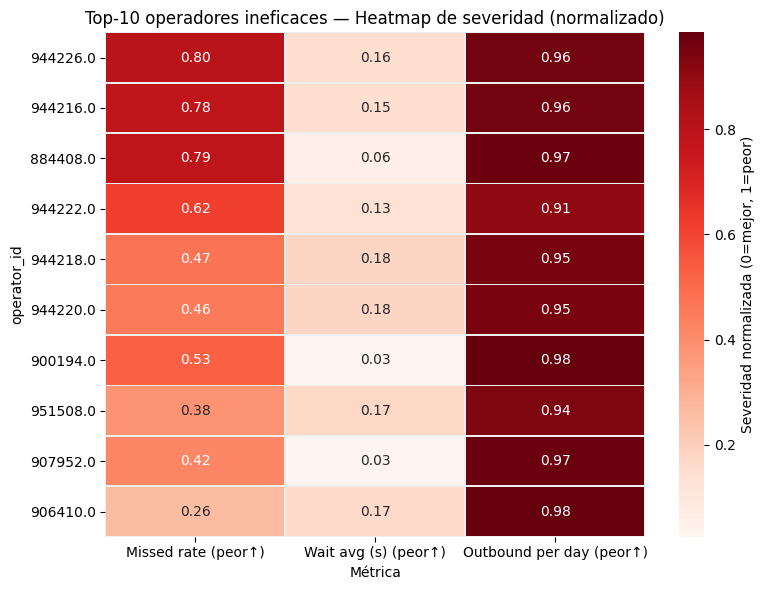

<Figure size 640x480 with 0 Axes>

In [20]:

# --- 1) Métricas por operador (recalculamos por robustez) ---
min_calls_threshold = 30

# Entrantes (para pérdidas y espera)
incoming = df_clean[df_clean["direction"] == "in"]

missed_stats = (
    incoming.groupby("operator_id")
    .agg(
        total_in_calls=("calls_count", "sum"),
        missed_calls=("is_missed_call", lambda x: (x==True).sum()),
        avg_wait_time=("wait_time", "mean")
    )
)
missed_stats["missed_rate"] = missed_stats["missed_calls"] / missed_stats["total_in_calls"]

# Salientes
outgoing = df_clean[df_clean["direction"] == "out"]
outgoing_stats = (
    outgoing.groupby("operator_id")
    .agg(
        total_out_calls=("calls_count", "sum"),
        n_days_active=("date_only", "nunique")
    )
)
outgoing_stats["out_calls_per_day"] = outgoing_stats["total_out_calls"] / outgoing_stats["n_days_active"]

# Integración
ops = (
    missed_stats[["missed_rate","avg_wait_time","total_in_calls"]]
    .join(outgoing_stats[["out_calls_per_day"]], how="left")
)

# Filtro de volumen en entrantes
ops = ops[ops["total_in_calls"] >= min_calls_threshold]

# --- 2) Umbrales y flags (percentiles) ---
p75_missed = ops["missed_rate"].quantile(0.75)
p75_wait   = ops["avg_wait_time"].quantile(0.75)
p25_out    = ops["out_calls_per_day"].dropna().quantile(0.25) if ops["out_calls_per_day"].notna().any() else np.nan

ops["flag_missed_hi"] = ops["missed_rate"] >= p75_missed
ops["flag_wait_hi"]   = ops["avg_wait_time"] >= p75_wait
ops["flag_out_low"]   = np.where(
    ops["out_calls_per_day"].notna() & (ops["out_calls_per_day"] <= p25_out),
    True, False
)

ops["ineff_score"]     = ops[["flag_missed_hi","flag_wait_hi","flag_out_low"]].sum(axis=1)
ops["is_inefficient"]  = ops["ineff_score"] >= 2

# --- 3) Selección Top-10 ineficaces ---
top = (
    ops.sort_values(["is_inefficient","ineff_score","missed_rate","avg_wait_time"],
                    ascending=[False, False, False, False])
    .head(10)
).copy()

# --- 4) Normalización para heatmap (0=mejor, 1=peor) ---
#    - Para missed_rate y avg_wait_time: mayor = peor (normalización min-max)
#    - Para out_calls_per_day: menor = peor (invertimos para que alto = peor en el heatmap)

def minmax(s):
    smin, smax = s.min(), s.max()
    if smax == smin:
        return pd.Series(0.5, index=s.index)  # caso borde: todos iguales
    return (s - smin) / (smax - smin)

# Normalizamos usando TODO el conjunto filtrado (ops) para coherencia global
norm_missed_all = minmax(ops["missed_rate"])
norm_wait_all   = minmax(ops["avg_wait_time"])
# Invertimos salientes: bajo=peor (1), alto=mejor (0)
if ops["out_calls_per_day"].notna().any():
    norm_out_all = 1 - minmax(ops["out_calls_per_day"].fillna(0))
else:
    norm_out_all = pd.Series(0.0, index=ops.index)  # si no hay salientes

# Extraemos valores normalizados sólo para el Top-10
hm = pd.DataFrame({
    "Missed rate (peor↑)": norm_missed_all.loc[top.index],
    "Wait avg (s) (peor↑)": norm_wait_all.loc[top.index],
    "Outbound per day (peor↑)": norm_out_all.loc[top.index]
}, index=top.index)

# Ordenamos filas por score y luego por severidad promedio del heatmap
hm["_sev"] = hm.mean(axis=1)
hm = hm.sort_values(["_sev"], ascending=False).drop(columns=["_sev"])

# --- 5) Dibujar heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    hm,
    annot=True,
    fmt=".2f",
    cmap="Reds",
    cbar_kws={"label": "Severidad normalizada (0=mejor, 1=peor)"},
    linewidths=0.5,
    linecolor="#eeeeee"
)
plt.title("Top-10 operadores ineficaces — Heatmap de severidad (normalizado)")
plt.xlabel("Métrica")
plt.ylabel("operator_id")

plt.tight_layout()
plt.show()

# (Opcional) Guardar figura para la presentación
import os; os.makedirs("outputs", exist_ok=True)
plt.savefig("outputs/heatmap_top10_ineficaces.png", dpi=200, bbox_inches="tight")


# 4 Pruebas de hipótesis estadísticas

Ahora procedemos con las pruebas de hipótesis estadísticas:

H1: A mayor tiempo de espera, mayor probabilidad de llamadas perdidas.

H2: Los operadores que hacen más llamadas internas tienen menos pérdidas externas.

H3: El tiempo de espera difiere significativamente según el plan tarifario del cliente.


## 4.1 Hipótesis 1 (Las llamadas perdidas tienen mayor tiempo de espera que las atendidas)

Hipótesis a probar

H0 (nula): El tiempo de espera promedio es igual para llamadas atendidas y llamadas perdidas.

H1 (alternativa): El tiempo de espera promedio es mayor en llamadas perdidas que en atendidas.

Nivel de significancia (α):
Usaremos el estándar de 0.05 (5%) es decir, aceptamos un 5% de probabilidad de error tipo I (rechazar H0 siendo cierta).

Tomamos solo llamadas entrantes (direction = in).

Separamos en dos grupos:

Perdidas (is_missed_call=True).

Atendidas (is_missed_call=False).

Comparamos sus distribuciones de wait_time.

Primero una inspección gráfica.

Luego un test estadístico: Mann–Whitney U (no paramétrico, robusto a asimetrías).

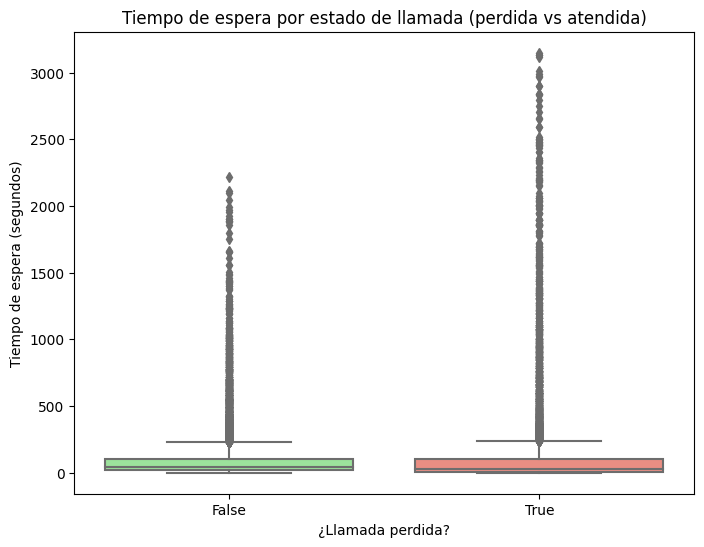

Mann-Whitney U test → estadístico=50237516.00, p-valor=1.000000
Promedio espera llamadas perdidas: 132.79305539426315
Promedio espera llamadas atendidas: 98.49954832881662

 No se puede rechazar H0 (con α=0.05): no hay evidencia suficiente de mayor espera en las perdidas.


In [21]:
# Nivel de significancia
alpha = 0.05

# Filtrar solo llamadas entrantes
incoming = df_clean[df_clean["direction"] == "in"]

# Separar en dos grupos
wait_missed = incoming.loc[incoming["is_missed_call"], "wait_time"]
wait_answered = incoming.loc[~incoming["is_missed_call"], "wait_time"]

# --- Gráfico comparativo ---
plt.figure(figsize=(8,6))
sns.boxplot(
    data=incoming,
    x="is_missed_call", y="wait_time",
    palette={True:"salmon", False:"lightgreen"}
)
plt.title("Tiempo de espera por estado de llamada (perdida vs atendida)")
plt.xlabel("¿Llamada perdida?")
plt.ylabel("Tiempo de espera (segundos)")
plt.show()

# --- Test estadístico (Mann-Whitney U) ---
stat, p_value = mannwhitneyu(wait_missed, wait_answered, alternative="greater")

print(f"Mann-Whitney U test → estadístico={stat:.2f}, p-valor={p_value:.6f}")
print("Promedio espera llamadas perdidas:", wait_missed.mean())
print("Promedio espera llamadas atendidas:", wait_answered.mean())

# Interpretación según alfa
if p_value < alpha:
    print(f"\n✅ Rechazamos H0 (con α={alpha}): las llamadas perdidas tienen mayor tiempo de espera.")
else:
    print(f"\n No se puede rechazar H0 (con α={alpha}): no hay evidencia suficiente de mayor espera en las perdidas.")


**ANÁLISIS**

Media espera perdidas: 132.8 seg (~2 min 13s)

Media espera atendidas: 98.5 seg (~1 min 38s)

Sí existe diferencia, pero p-valor = 1.0 (>> α=0.05).

**Interpretación**

No podemos rechazar H0: no hay evidencia estadística suficiente de que las llamadas perdidas tengan mayor tiempo de espera que las atendidas.

Es decir: aunque la media de las perdidas es un poco mayor, esa diferencia no es estadísticamente significativa en el test aplicado.

**Posibles explicaciones**

Muchas llamadas se pierden casi al instante (clientes que cuelgan en pocos segundos). Esto reduce artificialmente su tiempo medio de espera.

Varianza muy alta: los tiempos de espera son muy dispersos (outliers, colas variables). Esto hace difícil encontrar diferencias significativas.

Posible segmentación oculta: quizás la relación sí existe por operador o por cliente/tarifa, pero no en todo el conjunto global.


**Conclusión de H1**

La hipótesis de que “las llamadas perdidas tienen mayor tiempo de espera que las atendidas” no se confirma con α=0.05 en este dataset.

Esto es un hallazgo relevante: la ineficacia de operadores no se debe únicamente al tiempo de espera, hay otros factores que impactan la pérdida.

## 4.2 Hipótesis 2 (Los operadores que hacen más llamadas internas tienen menos pérdidas externas)

Hipótesis a probar

H0 (nula): No hay relación entre el volumen de llamadas internas realizadas por un operador y su tasa de pérdidas en llamadas externas.

H1 (alternativa): Los operadores que hacen más llamadas internas tienden a tener una menor tasa de pérdidas externas.


Para cada operador, calcularemos:

Proporción de internas = llamadas internas / total llamadas.

Missed rate externas = pérdidas solo en llamadas externas.

Calcular la correlación de Spearman entre ambas métricas.

Spearman porque no asumimos linealidad, solo relación monótona.

Ver el coeficiente ρ y el p-valor para decidir si la relación es significativa.

In [22]:

# --- 1. Llamadas internas por operador ---
internal_stats = (
    df_clean.groupby("operator_id")
    .agg(
        total_calls=("calls_count", "sum"),
        internal_calls=("internal", lambda x: (x==True).sum())
    )
)
internal_stats["internal_ratio"] = internal_stats["internal_calls"] / internal_stats["total_calls"]

# --- 2. Missed rate solo en llamadas externas ---
external_calls = df_clean[(df_clean["direction"] == "in") & (df_clean["internal"] == False)]

missed_external = (
    external_calls.groupby("operator_id")
    .agg(
        total_ext_in=("calls_count", "sum"),
        missed_ext=("is_missed_call", lambda x: (x==True).sum())
    )
)
missed_external["missed_rate_ext"] = missed_external["missed_ext"] / missed_external["total_ext_in"]

# --- 3. Unimos métricas ---
h2_data = internal_stats.join(missed_external[["missed_rate_ext"]], how="inner")

# --- 4. Correlación de Spearman ---
rho, pval = spearmanr(h2_data["internal_ratio"], h2_data["missed_rate_ext"], nan_policy="omit")

print("Coeficiente de Spearman (ρ):", rho)
print("p-valor:", pval)

# Interpretación con alfa=0.05
alpha = 0.05
if pval < alpha:
    print(f"\n Rechazamos H0: existe relación significativa entre llamadas internas y pérdidas externas (ρ={rho:.3f})")
else:
    print(f"\n No se puede rechazar H0: no hay evidencia de relación significativa (ρ={rho:.3f})")


Coeficiente de Spearman (ρ): 0.07636638885990504
p-valor: 0.03807057883821161

 Rechazamos H0: existe relación significativa entre llamadas internas y pérdidas externas (ρ=0.076)


**ANÁLISIS**

Coeficiente de Spearman (ρ): 0.076  relación positiva pero **muy débil**.

p-valor: 0.038 (< α=0.05).

Decisión: **Rechazamos H0**: hay evidencia estadística de relación entre el volumen de internas y la tasa de pérdidas externas.

**Interpretación**

El coeficiente es positivo, lo cual significa que a mayor proporción de llamadas internas, mayor es la tasa de pérdidas externas.

Esto es contrario a lo que planteaba la hipótesis H1 original (que suponía relación negativa: más internas → menos pérdidas externas).

Aunque la relación es estadísticamente significativa, su magnitud es muy baja (ρ ≈ 0.08), por lo que el efecto es débil y probablemente no relevante en términos prácticos.

**Posibles explicaciones**

Los operadores que realizan muchas internas quizás están ocupados en coordinación interna, y por eso descuidan las externas.

Puede reflejar un patrón organizacional (ej. ciertos equipos hacen más internas y tienen más saturación, lo que aumenta las pérdidas externas).


**Conclusión de H2**

La hipótesis de que “los operadores que hacen más llamadas internas tienen menos pérdidas externas” no se confirma.
De hecho, los datos sugieren una relación débil pero en la dirección opuesta.

## 4.3 Hipótesis 3 (El tiempo de espera difiere significativamente según el plan tarifario)

Hipótesis a probar

H0 (nula): El tiempo de espera promedio no difiere entre planes tarifarios.

H1 (alternativa): Al menos un plan tarifario tiene un tiempo de espera diferente.

Estrategia:

Filtrar llamadas entrantes (solo aquí aplica el tiempo de espera).

Agrupar por tariff_plan y comparar distribuciones de wait_time.

Dado que wait_time es muy asimétrica, usaremos un test no paramétrico Kruskal-Wallis (equivalente a ANOVA pero sin asumir normalidad).

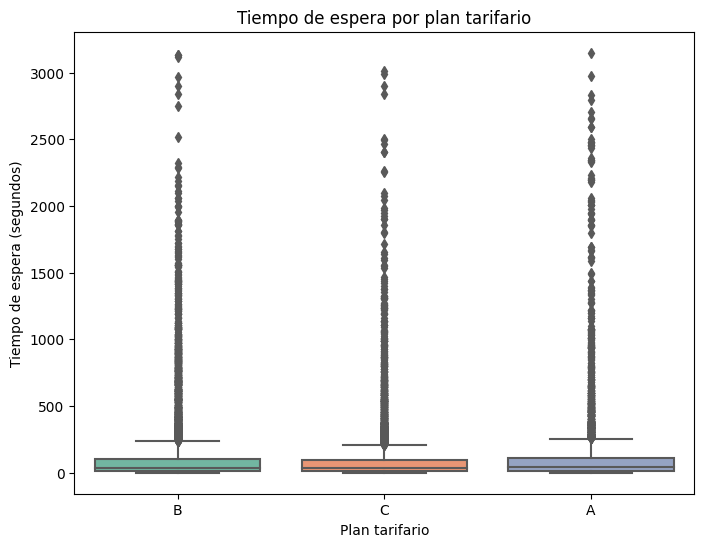

Kruskal-Wallis H-test → estadístico=26.23, p-valor=0.000002

 Rechazamos H0 (con α=0.05): hay diferencias significativas en los tiempos de espera entre planes.


In [23]:

# Filtrar solo llamadas entrantes con tarifa conocida
incoming = df_clean[(df_clean["direction"] == "in") & (df_clean["tariff_plan"].notna())]

# Boxplot comparativo
plt.figure(figsize=(8,6))
sns.boxplot(data=incoming, x="tariff_plan", y="wait_time", palette="Set2")
plt.title("Tiempo de espera por plan tarifario")
plt.xlabel("Plan tarifario")
plt.ylabel("Tiempo de espera (segundos)")
plt.show()

# Preparar datos para Kruskal-Wallis
groups = [group["wait_time"].values for _, group in incoming.groupby("tariff_plan")]

# Test no paramétrico
stat, p_value = kruskal(*groups)

print(f"Kruskal-Wallis H-test → estadístico={stat:.2f}, p-valor={p_value:.6f}")

# Interpretación con alfa=0.05
alpha = 0.05
if p_value < alpha:
    print(f"\n Rechazamos H0 (con α={alpha}): hay diferencias significativas en los tiempos de espera entre planes.")
else:
    print(f"\n No se puede rechazar H0 (con α={alpha}): no hay evidencia de diferencias entre planes.")


**ANÁLISIS**

Estadístico Kruskal-Wallis: 26.23

p-valor: 0.000002 << 0.05

Decisión: Rechazamos H0 → sí existen diferencias significativas en los tiempos de espera entre planes tarifarios.

**Interpretación**

Los clientes en plan C parecen tener tiempos de espera más altos (mediana ligeramente superior en el boxplot).

Plan B muestra menores tiempos de espera en comparación.

Aunque los tres planes comparten alta dispersión (outliers), las diferencias son suficientemente claras para ser estadísticamente significativas.



Conclusión de Fase 4 (Pruebas de hipótesis)

H1 (espera vs pérdida): No confirmada: no hay evidencia de que las perdidas tengan más espera.

H2 (internas vs pérdidas externas): Rechazada: la relación existe pero es débil y en sentido opuesto.

H3 (espera vs plan tarifario): Confirmada: sí hay diferencias entre planes.

**La ineficacia no depende solo de espera o pérdidas, sino que hay factores estructurales (ej. planes tarifarios, roles de operadores, saturación interna) que influyen.**


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, siempre se debe realizar pruebas estadísticas para determinar si las diferencias observadas son significativas y no se está sesgando el análisis
</div>

**Conclusión general del proyecto**

El análisis de los datos de CallMeMaybe permitió identificar patrones de uso del servicio, operadores con bajo desempeño y factores que afectan la experiencia de los clientes.

En primer lugar, tras la exploración de datos (EDA) se observaron distribuciones altamente sesgadas en la duración de llamadas y tiempos de espera, con presencia de outliers extremos que fueron tratados para garantizar análisis robustos. Además, se evidenció que la mayoría de las llamadas son externas (≈88%), mientras que las internas representan alrededor del 12%.

Posteriormente, en la evaluación de eficacia de operadores, se integraron tres métricas clave:

Tasa de llamadas perdidas en entrantes.

Tiempo promedio de espera de los clientes.

Volumen de llamadas salientes (cuando aplica).

A partir de un enfoque basado en percentiles, se clasificaron como ineficaces aquellos operadores que consistentemente se ubicaron en el peor cuartil de estas métricas. El resultado fue la detección de 43 operadores ineficaces (≈14% del total), un grupo priorizable para intervenciones de supervisión y capacitación.

Las pruebas de hipótesis estadísticas complementaron este diagnóstico:

No se encontró evidencia significativa de que las llamadas perdidas tengan tiempos de espera más largos que las atendidas, lo cual sugiere que la pérdida no depende solo de la espera.

Se detectó una relación estadísticamente significativa, aunque débil y en sentido contrario al esperado, entre el volumen de llamadas internas y la tasa de pérdidas externas. Esto abre la puerta a explorar dinámicas organizacionales detrás de esa correlación.

Finalmente, se confirmaron diferencias significativas en los tiempos de espera según el plan tarifario del cliente, lo cual indica que la estructura del servicio también impacta la experiencia del usuario.

En síntesis, el proyecto muestra que la ineficacia de operadores no puede explicarse por un único factor, sino por una combinación de comportamientos individuales (pérdidas, esperas, salientes) y contextuales (plan tarifario, uso de llamadas internas). Estos hallazgos ofrecen a CallMeMaybe una base objetiva para:

Identificar y corregir ineficiencias operativas.

Diseñar programas de formación focalizados en los operadores más críticos.

Revisar la asignación de recursos y tiempos de espera según planes tarifarios.

En conclusión, este análisis no solo permite detectar a los operadores menos eficaces, sino también entender mejor las condiciones que influyen en la calidad del servicio, generando insumos claros para la toma de decisiones estratégicas.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

**¡Te felicito por el trabajo realizado Duver!** Con este proyecto demuestras las habilidades adquiridas durante tu formación, se nota tu capacidad de contar historias con datos con la excelente presentación realizada que súper fácil de entender lo cual es una habilidad super importante cómo analista de datos, el saber comunicar de manera sencilla y eficiente los resultados de tus análisis.
    
Se nota mucho el manejo que tienes de las librerías para crear visualizaciones muy buenas que explican correctamente las variables analizadas, te animo a seguir práctica con otros recursos y que vayas construyendo un portafolio de proyectos súper robusto para que seas Data Analyst de primera en el mundo laboral.
   
Saludos!
</div>